# Machine Learning Project - 1

# Credit Card Default Prediction Using Machine Learning

##  Objectives :
### * Identify the key drivers that determine the likelihood of credit card default.
### * Predict the likelihood of credit card default for customers of the bank.

## Importing All Libraries & Pacakages

In [7]:
!pip install xgboost

   ---------------------------------------- 0.0/72.0 MB ? eta -:--:--
   ---------------------------------------- 0.3/72.0 MB ? eta -:--:--
    --------------------------------------- 1.0/72.0 MB 3.1 MB/s eta 0:00:23
    --------------------------------------- 1.6/72.0 MB 3.2 MB/s eta 0:00:22
   - -------------------------------------- 2.4/72.0 MB 3.2 MB/s eta 0:00:22
   - -------------------------------------- 3.1/72.0 MB 3.4 MB/s eta 0:00:21
   -- ------------------------------------- 3.7/72.0 MB 3.2 MB/s eta 0:00:22
   -- ------------------------------------- 4.5/72.0 MB 3.1 MB/s eta 0:00:22
   -- ------------------------------------- 5.0/72.0 MB 3.2 MB/s eta 0:00:22
   --- ------------------------------------ 5.8/72.0 MB 3.1 MB/s eta 0:00:22
   --- ------------------------------------ 6.0/72.0 MB 3.0 MB/s eta 0:00:22
   --- ------------------------------------ 6.6/72.0 MB 2.9 MB/s eta 0:00:23
   --- ------------------------------------ 7.1/72.0 MB 2.8 MB/s eta 0:00:23
   ---- -----

In [30]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV File I/O
from scipy.stats import randint
import matplotlib.pyplot as plt # this is used for plot the graph
import seaborn as sns # used for plot interactive graph
from pandas import set_option
plt.style.use('ggplot') # nice plots

from sklearn.model_selection import train_test_split # to split the data into two parts
from sklearn.linear_model import LinearRegression # to apply the Logistic Regression
from sklearn.feature_selection import RFE
from sklearn.model_selection import KFold # for cross validation
from sklearn.model_selection import GridSearchCV # for tuning parameter
from sklearn.model_selection import RandomizedSearchCV # Randomized search on hyper parameters.
from sklearn.preprocessing import StandardScaler # for Normalization
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier #KNN MODEL
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn import metrics # for the check the error and accuracy of the mode
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

import os
#print(os.listdir("../input"))


In [31]:
df = pd.read_csv("../Dataset/UCI_Credit_Card.csv")
df.sample(5)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
27489,27490,140000.0,1,3,1,53,0,0,0,0,...,83927.0,84861.0,86556.0,5400.0,3000.0,4000.0,3500.0,3504.0,3500.0,0
9597,9598,180000.0,2,2,1,41,0,0,0,0,...,111328.0,113890.0,116823.0,6411.0,6000.0,5000.0,4500.0,5000.0,4200.0,0
27700,27701,30000.0,2,2,2,25,0,0,0,0,...,23100.0,0.0,0.0,1500.0,1279.0,10000.0,0.0,0.0,0.0,0
22378,22379,240000.0,2,1,2,29,0,0,0,0,...,166589.0,165981.0,165951.0,5510.0,6000.0,8808.0,6006.0,6000.0,6000.0,0
21201,21202,20000.0,1,2,2,30,3,2,3,3,...,20795.0,20175.0,21265.0,2000.0,2000.0,3000.0,0.0,2000.0,0.0,0


Thre are variables that need to be converted to categories:
 * SEX: Gender
 1 = male 2 = Female
 * EDUCATION:
 1 = graduate school 2 = University 3 = high school 4 = others 5 = unknown 6 = unknown
 * MARRIAGE: Martial Status
 1 = married 2 = single 3 = others
 * PAY_0,2,3,4,5,6: Repayment status in September 2005,August 2005,July 2005,June 2005,May 2005, April 2005 (respectively) -2= no consumption -1= pay duly 1 = payment delay for one month 2 = pyment delay for two month ... 8 = payment delay for eight month 9 = payment delay for nine month and above


### Feature Engineering 
  The data has been already encoded and cleaned. However, some categorical data have repeated categories. For instance, the variable 'education' has three categories with similar information:
  4: others, 5:unknown, and 6:unknown

In [32]:
df.rename(columns={"default.payment.next.month": "Default"}, inplace=True)
df.drop('ID',axis=1,inplace=True) #drop column "ID"
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 24 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   LIMIT_BAL  30000 non-null  float64
 1   SEX        30000 non-null  int64  
 2   EDUCATION  30000 non-null  int64  
 3   MARRIAGE   30000 non-null  int64  
 4   AGE        30000 non-null  int64  
 5   PAY_0      30000 non-null  int64  
 6   PAY_2      30000 non-null  int64  
 7   PAY_3      30000 non-null  int64  
 8   PAY_4      30000 non-null  int64  
 9   PAY_5      30000 non-null  int64  
 10  PAY_6      30000 non-null  int64  
 11  BILL_AMT1  30000 non-null  float64
 12  BILL_AMT2  30000 non-null  float64
 13  BILL_AMT3  30000 non-null  float64
 14  BILL_AMT4  30000 non-null  float64
 15  BILL_AMT5  30000 non-null  float64
 16  BILL_AMT6  30000 non-null  float64
 17  PAY_AMT1   30000 non-null  float64
 18  PAY_AMT2   30000 non-null  float64
 19  PAY_AMT3   30000 non-null  float64
 20  PAY_AM

#### Seprating Features and Target

In [33]:
y = df.Default   # target default or non-default = 0
features = df.drop('Default',axis=1,inplace=False)

In [34]:
df['EDUCATION'].unique()

array([2, 1, 3, 5, 4, 6, 0])

The categories 4: others, 5:unknown, and 6:unknown can be grouped into a single class '4'.

In [35]:
df['EDUCATION']=np.where(df['EDUCATION'] == 5,4, df['EDUCATION'])
df['EDUCATION']=np.where(df['EDUCATION'] == 6,4, df['EDUCATION'])
df['EDUCATION']=np.where(df['EDUCATION'] == 0,4, df['EDUCATION'])

After grouping, the education columns has the following categories:

In [36]:
df['EDUCATION'].unique()

array([2, 1, 3, 4])

Similarly, the column 'marriage' should have three categories: 1 = married, 2 = single, 3 = others but it contains a category '0' which will be joined to the category '3'

In [37]:
df['MARRIAGE'].unique()

array([1, 2, 3, 0])

In [38]:
df['MARRIAGE']=np.where(df['MARRIAGE']== 0, 3, df['MARRIAGE'])
df['MARRIAGE'].unique()

array([1, 2, 3])

# Exploratory Data Analysis (EDA)
### Mapping the target: Categorizing
#### from this sample of 30,000 credit card holders, there were 6,636 default credit cards; that is, the proportion of default in the data is 22,1%

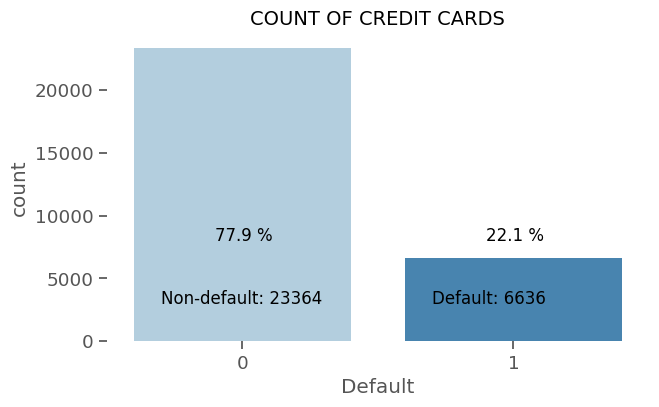

In [39]:
# The frequency of defaults

yes = df.Default.sum()
no = len(df)-yes 

# Percentage
yes_prd = round(yes/len(df)*100 , 1)
no_prd = round(no/len(df)*100 , 1)

import sys
plt.figure(figsize=(7,4))
sns.set_context('notebook',font_scale=1.2)
sns.countplot(x='Default', data=df, palette="Blues")
plt.annotate('Non-default: {}'.format(no), xy=(-0.3,15000) , xytext=(-0.3,3000), size=12)
plt.annotate('Default: {}'.format(yes), xy=(0.7,15000) , xytext=(0.7,3000), size=12)
plt.annotate(str(no_prd)+" %", xy = (-0.3, 15000), xytext=(-0.1, 8000), size=12)
plt.annotate(str(yes_prd)+ " %", xy =(0.7, 15000), xytext=(0.9,8000), size=12)
plt.title('COUNT OF CREDIT CARDS', size=14)

#Removing the frame
plt.box(False);

## Descriptive Statistics
### The table shows the descriptive statistics of the variable of this dataset.

In [40]:
pd.set_option('display.width', 100)
pd.set_option('display.precision',2)

print("SUMMARY STATISTICS OF NUMERIC COLUMNS")
print()
print(df.describe().T)

SUMMARY STATISTICS OF NUMERIC COLUMNS

             count       mean        std       min       25%       50%        75%       max
LIMIT_BAL  30000.0  167484.32  129747.66   10000.0  50000.00  140000.0  240000.00  1.00e+06
SEX        30000.0       1.60       0.49       1.0      1.00       2.0       2.00  2.00e+00
EDUCATION  30000.0       1.84       0.74       1.0      1.00       2.0       2.00  4.00e+00
MARRIAGE   30000.0       1.56       0.52       1.0      1.00       2.0       2.00  3.00e+00
AGE        30000.0      35.49       9.22      21.0     28.00      34.0      41.00  7.90e+01
PAY_0      30000.0      -0.02       1.12      -2.0     -1.00       0.0       0.00  8.00e+00
PAY_2      30000.0      -0.13       1.20      -2.0     -1.00       0.0       0.00  8.00e+00
PAY_3      30000.0      -0.17       1.20      -2.0     -1.00       0.0       0.00  8.00e+00
PAY_4      30000.0      -0.22       1.17      -2.0     -1.00       0.0       0.00  8.00e+00
PAY_5      30000.0      -0.27       1.13 


The average value for the amount of credit card limit is 167,484 NT dollars, The standard deviation is 129,747 NT dollar, ranging from 10,000 to 1M NT Dollars.
Education level is mostlly graduate school(1) and university(2). Most of the clients are either married or single (less frequent the other status) Average age is 35.5 year, with a standard deviation of 9.2 years

#### Frequency of Explanatory variables by defaulted and non-defaulted cards

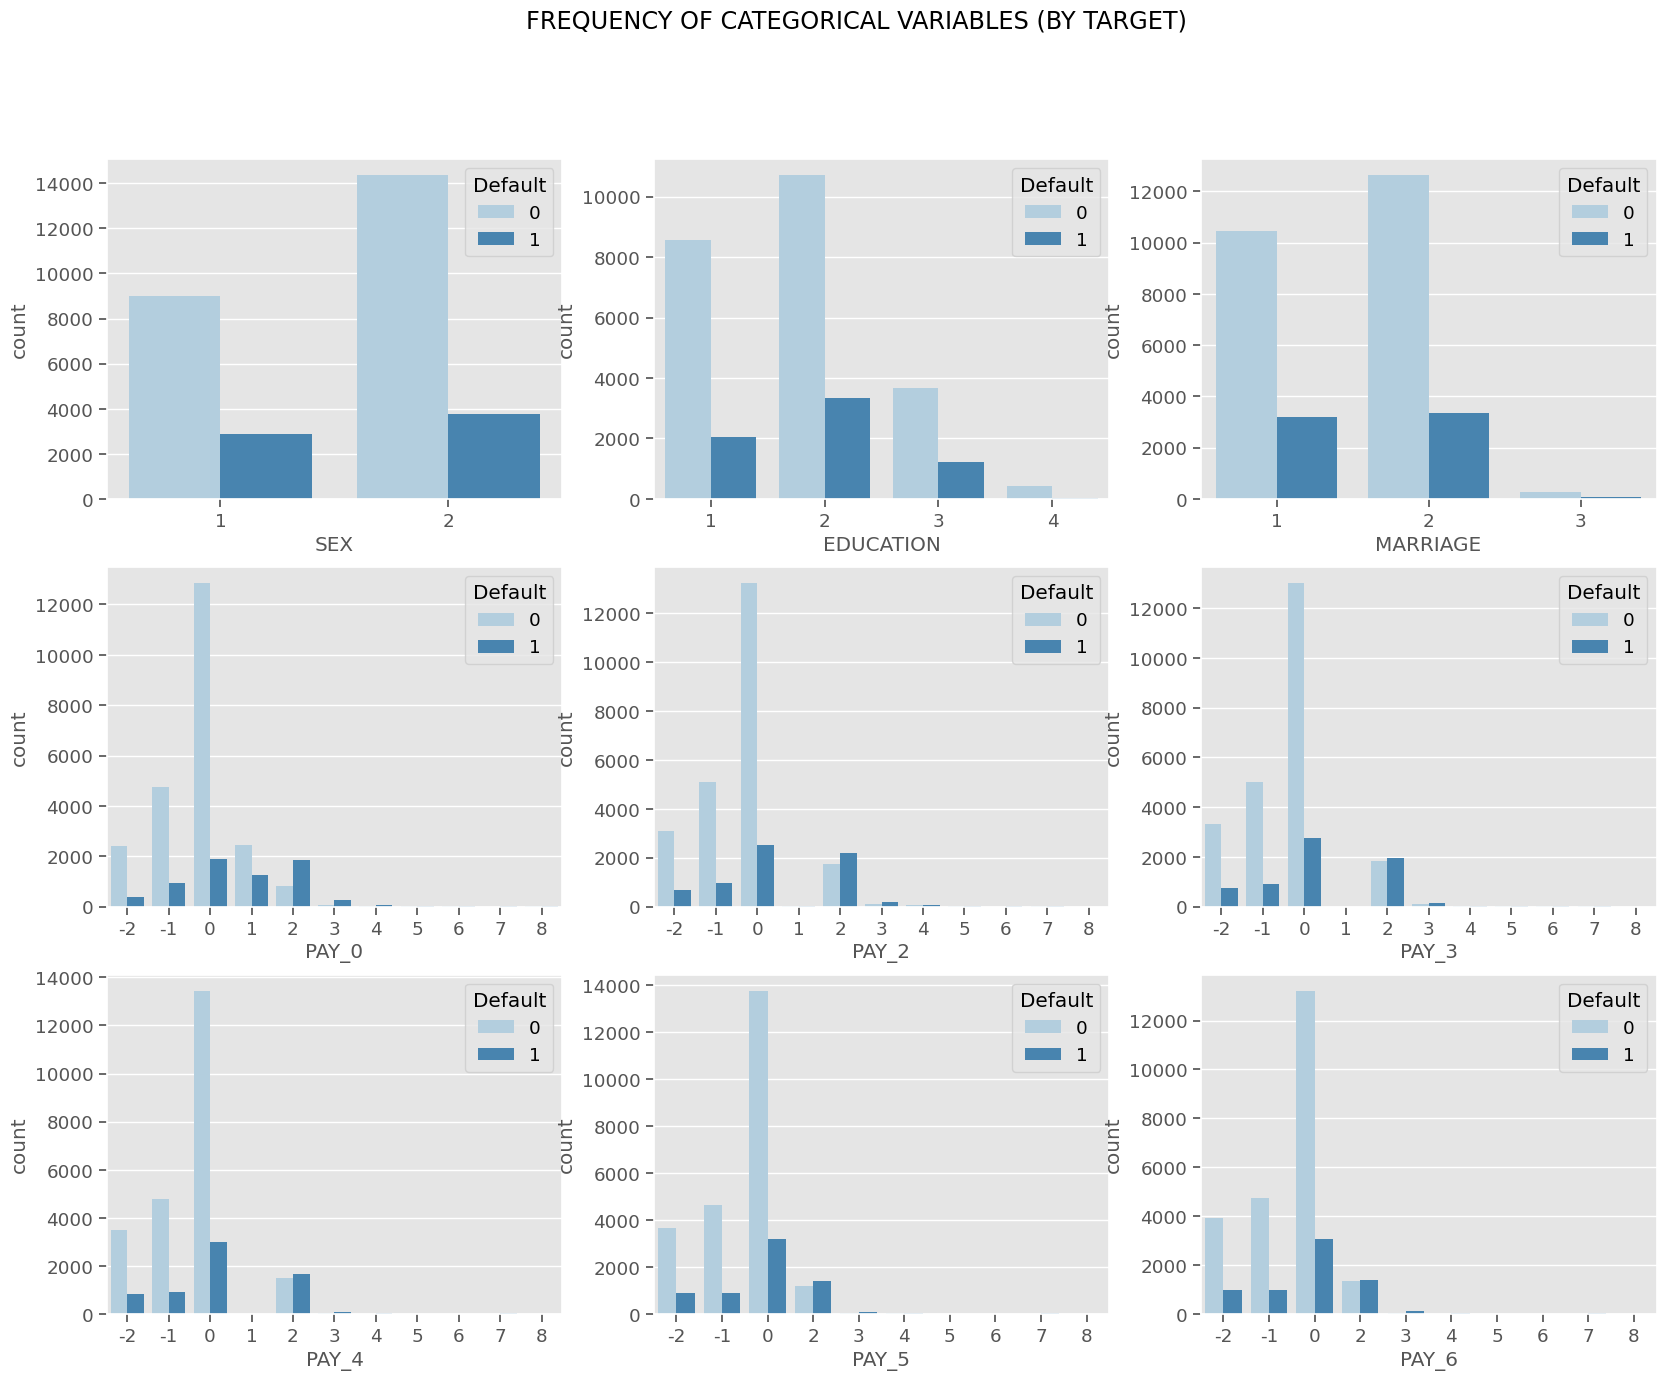

In [41]:
# creating a new dataframe with categorical variables

subset = df[['SEX','EDUCATION','MARRIAGE','PAY_0','PAY_2','PAY_3','PAY_4','PAY_5','PAY_6','Default']]

f, axes = plt.subplots(3,3, figsize = (20,15), facecolor = 'white')
f.suptitle('FREQUENCY OF CATEGORICAL VARIABLES (BY TARGET)')
ax1 = sns.countplot(x = 'SEX', hue = "Default" , data = subset, palette="Blues", ax = axes[0,0])
ax2 = sns.countplot(x = 'EDUCATION', hue = "Default" , data = subset, palette="Blues", ax = axes[0,1])
ax3 = sns.countplot(x = 'MARRIAGE', hue = "Default" , data = subset, palette="Blues", ax = axes[0,2])
ax4 = sns.countplot(x = 'PAY_0', hue = "Default" , data = subset, palette="Blues", ax = axes[1,0])
ax5 = sns.countplot(x = 'PAY_2', hue = "Default" , data = subset, palette="Blues", ax = axes[1,1])
ax6 = sns.countplot(x = 'PAY_3', hue = "Default" , data = subset, palette="Blues", ax = axes[1,2])
ax7 = sns.countplot(x = 'PAY_4', hue = "Default" , data = subset, palette="Blues", ax = axes[2,0])
ax8 = sns.countplot(x = 'PAY_5', hue = "Default" , data = subset, palette="Blues", ax = axes[2,1])
ax9 = sns.countplot(x = 'PAY_6', hue = "Default" , data = subset, palette="Blues", ax = axes[2,2])

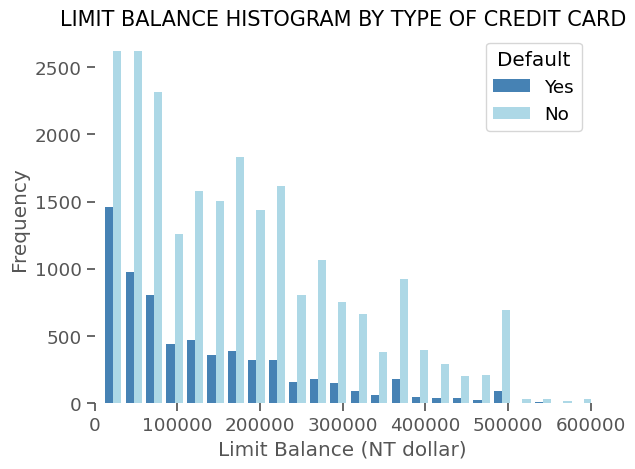

In [42]:
# Seprate the limit balance based on the default status
x1 = list(df[df['Default'] == 1]['LIMIT_BAL'])
x2 = list(df[df['Default'] == 0]['LIMIT_BAL'])

plt.Figure(figsize=(12,4))
sns.set_context('notebook', font_scale=1.2)

#Plot the histogram
plt.hist([x1,x2], bins=40, density=False, color=['steelblue','lightblue'])
plt.xlim([0,600000])

# Add legend
plt.legend(['Yes','No'], title = 'Default', loc='upper right', facecolor='white')

# Add labes and title
plt.xlabel('Limit Balance (NT dollar)')
plt.ylabel('Frequency')
plt.title('LIMIT BALANCE HISTOGRAM BY TYPE OF CREDIT CARD', size=15)

# Remove the frame
plt.box(False)

# Save the figure
plt.savefig('ImageName.png', format='png', dpi=200, transparent = True)


# Display the plot
plt.show()

There are 30,000 credit card clients

The average value for the amount of credit card limit is 167,484 NT dollars. The standard deviation is 129,747 NT dollars, ranging from 10,000 to 1M NT dollars.

Education level is mostly graduate school and university.

Most of the clients are either married or single (less frequent the other status)

Average age is 35.5 years, with a standard deviation of 9.2

As the value 0 for default payment means 'not default' and value 1 mean 'default'. the of 0.221 means that there are 22.1% of credit card contracts that will default next month (will verify this in the next section of this analysis).

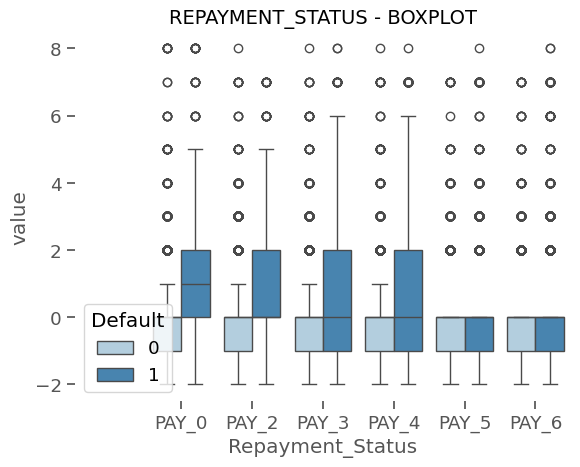

In [43]:
Repayment = df[['PAY_0','PAY_2','PAY_3','PAY_4','PAY_5','PAY_6']]
Repayment = pd.concat([y,Repayment], axis = 1)
Repayment = pd.melt(Repayment, id_vars = "Default", var_name = "Repayment_Status", value_name = 'value')

plt.Figure(figsize=(10,8))
sns.set_context('notebook', font_scale=1.2)
sns.boxplot(y="value", x="Repayment_Status", hue="Default", data=Repayment, palette="Blues")
plt.legend(loc='best', title='Default' , facecolor = 'white')
plt.xlim([-1.5,5.5])
plt.title('REPAYMENT_STATUS - BOXPLOT', size=14)
plt.box(False)
plt.savefig('ImageName', format='png', dpi=200);

It seems that PAY_0 (Repayment status in September) and PAY_2 (Repayment status in August) have more discriminatory power the repayment status in other month

### Standardizing and plotting the data

The boxplot below reveals that features are in different scale and units. Many models use some form of distance when making predictions, and therefore, it is recommended to noramlize the data

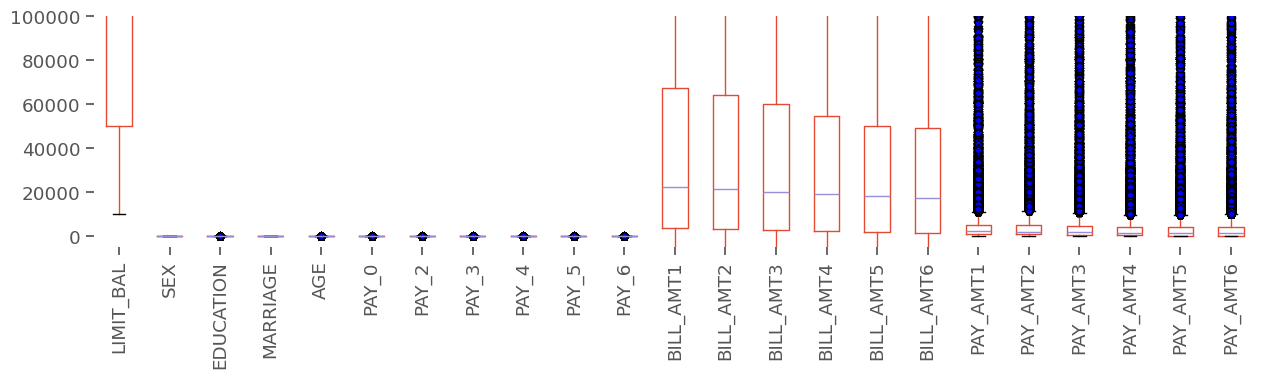

In [44]:
# data are distributed in wide range (below), need to be normalized.

# 1. Define your outlier style FIRST
outliers = dict(markerfacecolor = 'b', marker = 'p')

# 2. Create your figure
plt.figure(figsize=(15,3))

# 3. Call boxplot ONCE on the correct DataFrame.
#    I'll assume 'features' is your DataFrame with all the columns to plot.
ax = features.boxplot(rot = 90, flierprops = outliers)

# 4. THIS IS THE KEY: Set the Y-axis limits to "zoom in"
#    This will cut off outliers above 100,000
ax.set_ylim(-5000, 100000) 

# 5. This line is fine
plt.box(False)

Standardization of data was performed; i.e all features are centered around zero and have variance one. Features were plotted again, using a violion plot.

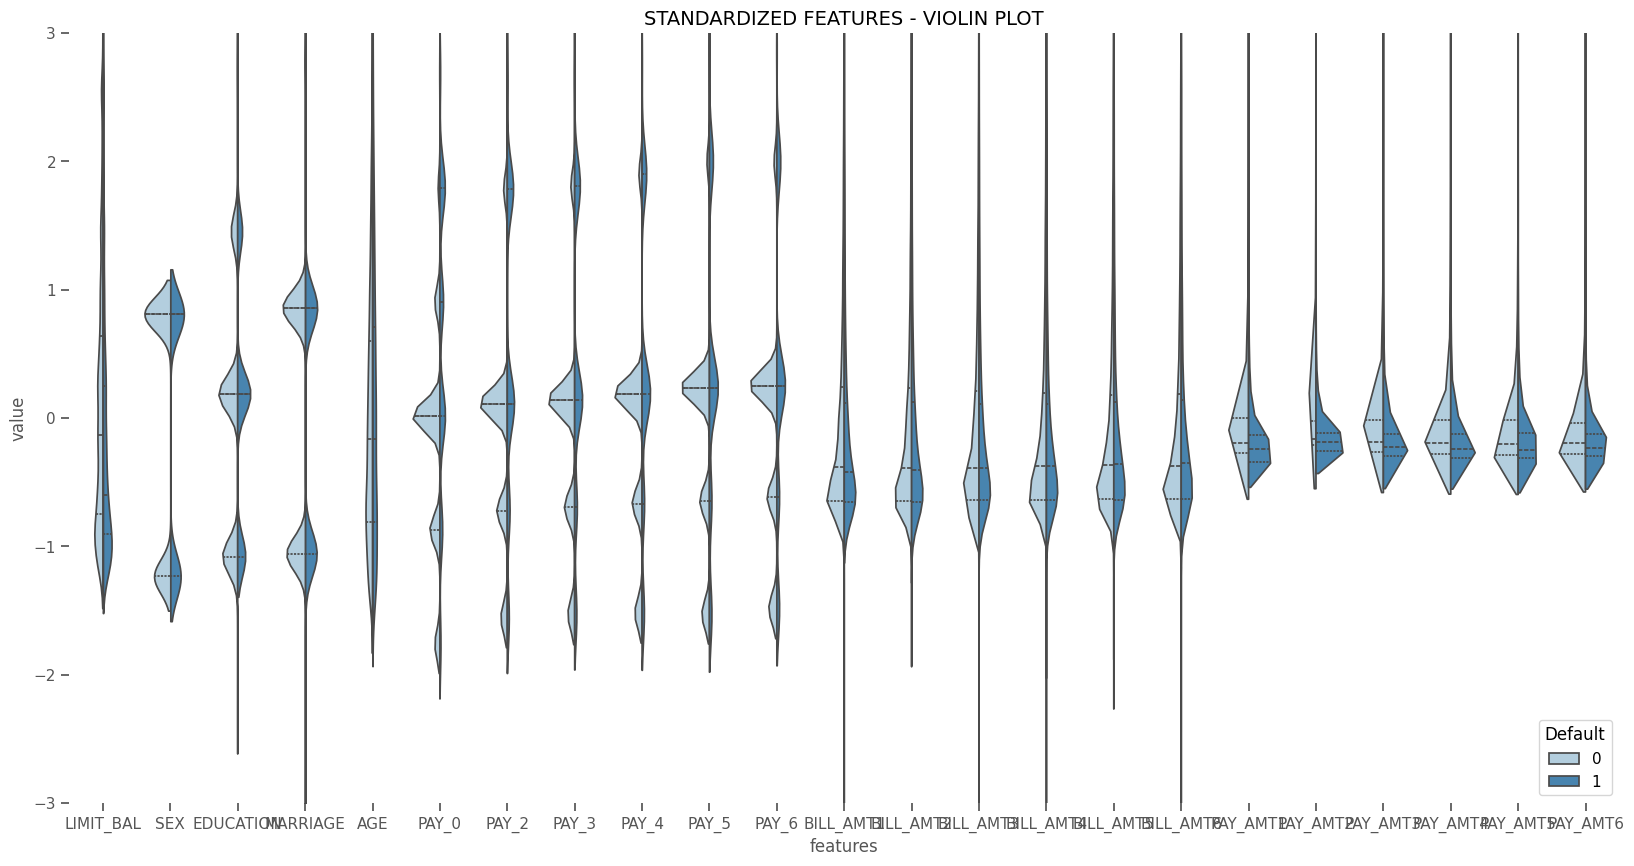

In [45]:
stdX = (features - features.mean())/ (features.std())
data_st = pd.concat([y,stdX.iloc[:,:]],axis=1)
data_st = pd.melt(data_st,id_vars="Default",var_name="features",value_name="value")

plt.figure(figsize=(20,10))
sns.set_context('notebook',font_scale=1)
sns.violinplot(y='value', x = 'features', hue = "Default", data=data_st, split=True, inner="quart", palette="Blues")

plt.legend(loc=4, title='Default', facecolor = 'white')
plt.ylim([-3,3])
plt.title('STANDARDIZED FEATURES - VIOLIN PLOT', size=14)
plt.box(False)
plt.savefig('ImageName', format='png', dpi=200, transparent = False)

### Correlation

A correlation matrix of all variables is shown in the heatmap below. The only feature with a notable positive correlation with the dependant variable 'Default' is re-payment status during the last month (September). The highest negative correlation with default occurs with Limit_Balance, indicating that customers with lower limit balance are more likely to default. it can also be observed that some variables are highly correlated to each other, that is the case of the amount of bill statement and the repayment status in different months.

Looking at correlations matrix, defined via Pearson Function

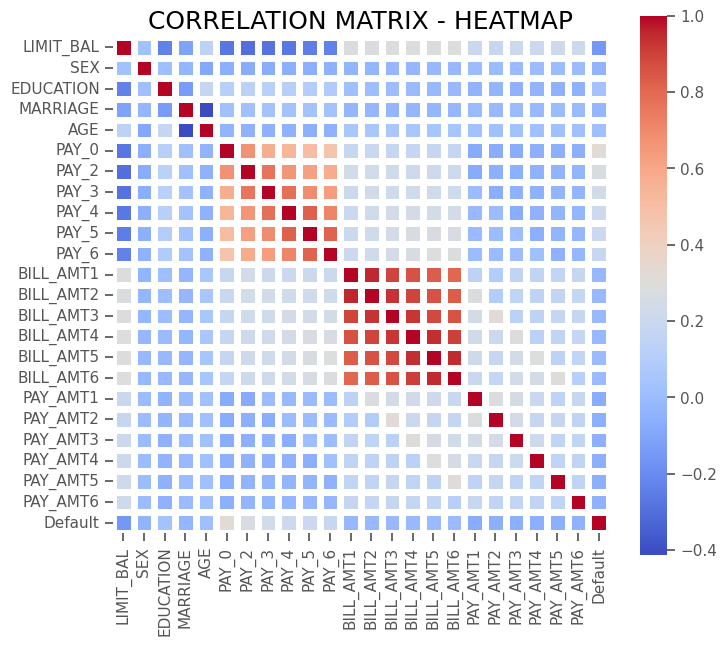

In [46]:
# looking at correlations matrix, defined via Pearson Function

corr = df.corr() #.corr is used to find correlation
f,ax = plt.subplots(figsize=(8,7))
sns.heatmap(corr, cbar=True , square=True , annot=False , fmt='.1f',
            xticklabels=True, yticklabels=True,
            cmap="coolwarm", linewidths=5 , ax=ax)

plt.title('CORRELATION MATRIX - HEATMAP', size=18);

The heatmap shows that features are correlated with each other (collinearity), such as like PAY_0,2,3,4,5,6 and BILL_AMT1,2,3,4,5,6. in those cases, the correlation is positive.

Uncorrelated data are poentially more useful: discriminatory!

### `What do correlation means?`

Lets seperately fit correlated and uncorrelated data via linear regression:

Uncorrelated data are poentially more useful: discrimentory!


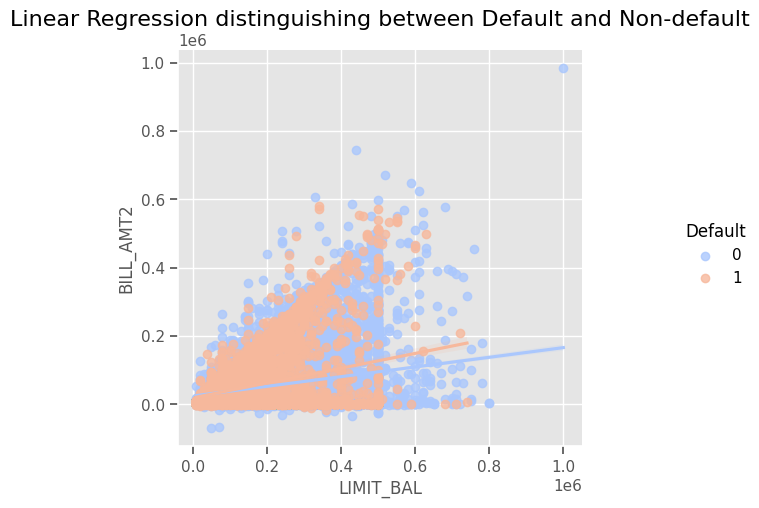

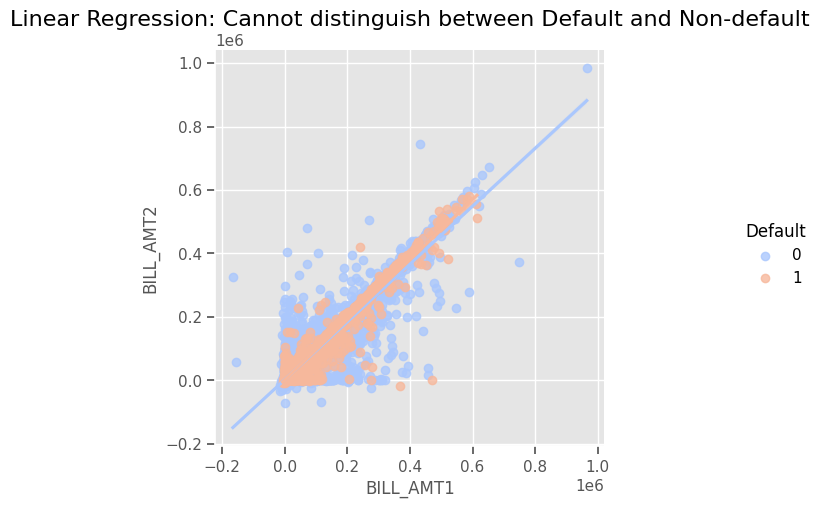

In [47]:
sns.lmplot(x='LIMIT_BAL', y = 'BILL_AMT2' , data=df , hue='Default', palette="coolwarm")

plt.title('Linear Regression distinguishing between Default and Non-default', size=16)

sns.lmplot(x='BILL_AMT1', y = 'BILL_AMT2', data=df, hue='Default', palette='coolwarm')
plt.title('Linear Regression: Cannot distinguish between Default and Non-default', size=16);

print('Uncorrelated data are poentially more useful: discrimentory!')


## Machine Learning: Classification Models

The classification models used for this analysis are: Decision Tree and Random Forest Classifier.

To build machine learning models the original data was divided into features(X) and target(y) and then split into train (80%) and test (20%) sets. Thus, the algorithms would be trained on one set of data and tested out on a completely different set of data (not seen before by the algorithm).

#### Spliting the data into train and test sets

In [48]:
# Original dataset
X = df.drop('Default', axis=1)
y = df['Default']

X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.2 , stratify=y, random_state=42)

In [49]:
# Dataset with standardized features
Xstd_train,Xstd_test,ystd_train,ystd_test = train_test_split(stdX,y,test_size=0.2,stratify=y,random_state=42)

### Decision Tree Clasifier

Decission Tree is another very popular algorithm for classfication problem because it is easy to interpret and understand. An internal node represent a feature, the branch represnts a decission rule, and each leaf node represents the outcome. Some advantages of decission trees are that they require less data preprocessing, i.e, no need to normalize features. However noisy data can be easily overfitted and results in baised results when the data set is imbalanced.

In [50]:
# setup the parameters and distributions to sample from: param_dist
# corrected param grid (note min_samples_leaf)
param_dist = {
    "max_depth": [1,2,3,4,5,6,7,8,9],
    "max_features": [1,2,3,4,5,6,7,8,9],
    "min_samples_leaf": [1,2,3,4,5,6,7,8,9],
    "criterion": ["gini","entropy"]
}

# instantiate classifier
tree = DecisionTreeClassifier(random_state=42)

# Randomized search: set n_iter, use all CPUs, show progress, choose scoring appropriate for imbalance (e.g., 'roc_auc')
tree_cv = RandomizedSearchCV(
    estimator=tree,
    param_distributions=param_dist,
    n_iter=30,           # number of random parameter settings to try
    cv=5,
    scoring='roc_auc',   # or 'accuracy' / other metric
    n_jobs=-1,
    random_state=0,
    verbose=1
)

# Fit
tree_cv.fit(X_train, y_train)

# Print results
print("Tuned Decision Tree Parameters:", tree_cv.best_params_)
print("Best CV score:", tree_cv.best_score_)

Fitting 5 folds for each of 30 candidates, totalling 150 fits
Tuned Decision Tree Parameters: {'min_samples_leaf': 6, 'max_features': 2, 'max_depth': 7, 'criterion': 'entropy'}
Best CV score: 0.7561104859266731


Accuracy: 0.808

              precision    recall  f1-score   support

           0       0.83      0.94      0.88      4673
           1       0.63      0.33      0.43      1327

    accuracy                           0.81      6000
   macro avg       0.73      0.64      0.66      6000
weighted avg       0.79      0.81      0.78      6000


Average 5-Fold CV Score: 0.8121 , Standard deviation: 0.0085


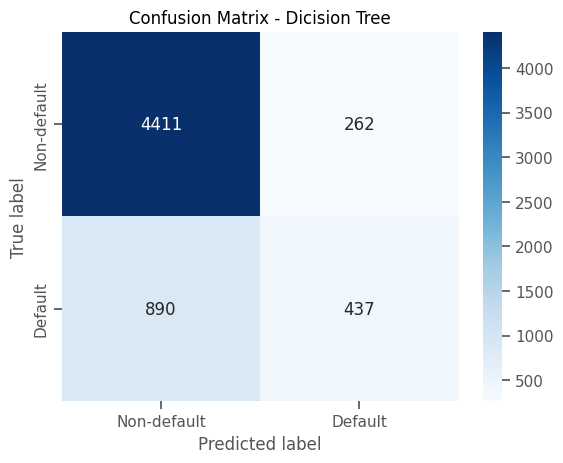

In [51]:
Tree = DecisionTreeClassifier(criterion='gini', max_depth=7,
                        max_features=9, min_samples_leaf=2,
                        random_state=0)
Tree.fit(X_train,y_train)
yes_prd = Tree.predict(X_test)
print('Accuracy:', metrics.accuracy_score(yes_prd,y_test))

## t-fold cross-validation
cv_scores = cross_val_score(Tree,X,y,cv=5)

# Print the 5-fold cross-validation scores
print()
print(classification_report(y_test,yes_prd))
print()
print("Average 5-Fold CV Score: {}".format(round(np.mean(cv_scores),4)),
      ", Standard deviation: {}".format(round(np.std(cv_scores),4)))

plt.Figure(figsize=(4,3))
confMatrix = confusion_matrix(y_test,Tree.predict(X_test))
sns.heatmap(confMatrix,annot=True, cmap="Blues", fmt = "d",
            xticklabels=['Non-default','Default'],
            yticklabels=['Non-default','Default'])
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title("Confusion Matrix - Dicision Tree");

The performance of the decission tree model improved comapred to the logistic regression model showed previously.However, the recall is still low (0.33).

### Random Forest Classifier

Random forest classifier is comprised of multiple decission trees. it creates different random subset of decission trees from the training set as its predictors and select the best solution by mean of voting. As a result, the Random Forest model avoids overfitting problems.

In [52]:
# Create the Random grid
param_dist = {'n_estimators': [50,100,150,200,250],
              "max_features": [1,2,3,4,5,6,7,8,9],
              "max_depth": [1,2,3,4,5,6,7,8,9],
              "criterion": ["gini","entropy"]}

rf = RandomForestClassifier()

rf_cv = RandomizedSearchCV(rf, param_distributions=param_dist, cv = 5 , random_state=0, n_jobs=-1)

rf_cv.fit(X,y)
print("Tuned Random Forest Parameters: %s" % (rf_cv.best_params_))

Tuned Random Forest Parameters: {'n_estimators': 150, 'max_features': 5, 'max_depth': 6, 'criterion': 'gini'}


Accuracy: 0.8171666666666667

              precision    recall  f1-score   support

           0       0.84      0.95      0.89      4673
           1       0.66      0.35      0.46      1327

    accuracy                           0.82      6000
   macro avg       0.75      0.65      0.67      6000
weighted avg       0.80      0.82      0.79      6000


Average 5-Fold CV Score: 0.8203 , Standard deviation: 0.0093


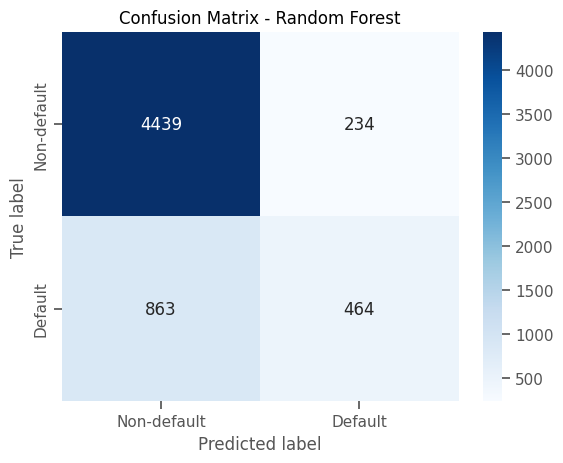

In [53]:
Ran = RandomForestClassifier(criterion='gini', max_depth=6,
                             max_features=5, n_estimators=150,
                             random_state=0)
Ran.fit(X_train,y_train)
y_pred = Ran.predict(X_test)
print('Accuracy:', metrics.accuracy_score(y_pred,y_test))

## 5-fold cross-validation
cv_scores = cross_val_score(Ran,X,y,cv=5)

# Print the 5-fold cross-validation scores
print()
print(classification_report(y_test,y_pred))
print()
print("Average 5-Fold CV Score: {}".format(round(np.mean(cv_scores),4)),
      ", Standard deviation: {}".format(round(np.std(cv_scores),4)))

plt.Figure(figsize=(4,3))
confMatrix = confusion_matrix(y_test, Ran.predict(X_test))
sns.heatmap(confMatrix,annot=True, cmap="Blues", fmt = "d",
            xticklabels=['Non-default','Default'],
            yticklabels=['Non-default','Default'])
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title("Confusion Matrix - Random Forest");


In [28]:
import joblib

# Save the trained model to a file
joblib.dump(Ran, 'random_forest_model.joblib')

['random_forest_model.joblib']

# ------------------------- THE END ------------------------------